<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Libraries" data-toc-modified-id="Load-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Libraries</a></span></li><li><span><a href="#Tweak-Display-Settings" data-toc-modified-id="Tweak-Display-Settings-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tweak Display Settings</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Load-File" data-toc-modified-id="Load-File-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Load File</a></span></li></ul></li></ul></li><li><span><a href="#Per-Processing" data-toc-modified-id="Per-Processing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Per-Processing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#NULL-Check" data-toc-modified-id="NULL-Check-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>NULL Check</a></span></li><li><span><a href="#Create-Time-Stamp-From-UNIX-Time" data-toc-modified-id="Create-Time-Stamp-From-UNIX-Time-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Create Time Stamp From UNIX Time</a></span></li><li><span><a href="#Channel_ID-and-Channel_Name-are-same" data-toc-modified-id="Channel_ID-and-Channel_Name-are-same-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>Channel_ID and Channel_Name are same</a></span></li><li><span><a href="#Sort-the-data-by-Time" data-toc-modified-id="Sort-the-data-by-Time-4.0.4"><span class="toc-item-num">4.0.4&nbsp;&nbsp;</span>Sort the data by Time</a></span></li><li><span><a href="#Uniques-in-VARIENT" data-toc-modified-id="Uniques-in-VARIENT-4.0.5"><span class="toc-item-num">4.0.5&nbsp;&nbsp;</span>Uniques in VARIENT</a></span></li><li><span><a href="#Unique-in-CACHE_RESULT_CODE" data-toc-modified-id="Unique-in-CACHE_RESULT_CODE-4.0.6"><span class="toc-item-num">4.0.6&nbsp;&nbsp;</span>Unique in CACHE_RESULT_CODE</a></span></li></ul></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#USER-IP" data-toc-modified-id="USER-IP-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>USER IP</a></span></li><li><span><a href="#X_PLAY_BACK_SESSION_ID" data-toc-modified-id="X_PLAY_BACK_SESSION_ID-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>X_PLAY_BACK_SESSION_ID</a></span></li><li><span><a href="#CHANNEL_ID" data-toc-modified-id="CHANNEL_ID-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>CHANNEL_ID</a></span></li><li><span><a href="#CACHE_RESULT_CODE" data-toc-modified-id="CACHE_RESULT_CODE-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>CACHE_RESULT_CODE</a></span></li><li><span><a href="#Aggregate-Analysis" data-toc-modified-id="Aggregate-Analysis-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Aggregate Analysis</a></span><ul class="toc-item"><li><span><a href="#Time-Spent-per-session" data-toc-modified-id="Time-Spent-per-session-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Time Spent per session</a></span></li></ul></li></ul></li></ul></div>

## Load Libraries ##

In [1]:
import time
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.cm as cm
import warnings

## Tweak Display Settings ##

In [12]:
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('max_colwidth',999)
pd.set_option('display.max_columns', 999)
pd.set_option("display.max_rows",999)
pd.set_option('precision',10)

#################################
##### Labels Resize #####
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
#################################

## Load Data ##

#### Data Description ####

#### Load File ####

In [3]:
train = pd.read_csv("C:/Users/sutiwari/Downloads/Cybage/video_streaming_data.csv")

In [5]:
train.shape

(30530, 9)

In [6]:
train.head()

,USERS_IP,UNIX_TIMESTAMP,X_PLAY_BACK_SESSION_ID,CHANNEL_ID,CHANNEL_NAME,VARIANT,SEGMENT_INDEX,CACHE_RESULT_CODE,TIME_TO_SERVER_MS
0,24.225.30.35,1535932476,02f7e781-f688-43aa-9cb1-633fb1e97022,11016,ABC KAKE,V5000_W,255988741,TCP_HIT,952
1,24.225.30.35,1535932458,02f7e781-f688-43aa-9cb1-633fb1e97022,11016,ABC KAKE,V5000_W,255988738,TCP_HIT,894
2,24.225.30.35,1535932620,02f7e781-f688-43aa-9cb1-633fb1e97022,11016,ABC KAKE,V5000_W,255988765,TCP_HIT,902
3,24.225.30.35,1535932764,02f7e781-f688-43aa-9cb1-633fb1e97022,11016,ABC KAKE,V5000_W,255988789,TCP_HIT,888
4,24.225.30.35,1535932673,02f7e781-f688-43aa-9cb1-633fb1e97022,11016,ABC KAKE,V5000_W,255988773,TCP_HIT,740


## Per-Processing ##

#### NULL Check ####

In [8]:
train.isnull().sum()

USERS_IP                  0
UNIX_TIMESTAMP            0
X_PLAY_BACK_SESSION_ID    0
CHANNEL_ID                0
CHANNEL_NAME              0
VARIANT                   0
SEGMENT_INDEX             0
CACHE_RESULT_CODE         0
TIME_TO_SERVER_MS         0
dtype: int64

#### Create Time Stamp From UNIX Time ####

In [61]:
train["TimeStampInSec"] = pd.to_datetime(train.UNIX_TIMESTAMP,unit='s')

In [72]:
train.head()

,USERS_IP,UNIX_TIMESTAMP,X_PLAY_BACK_SESSION_ID,CHANNEL_ID,CHANNEL_NAME,VARIANT,SEGMENT_INDEX,CACHE_RESULT_CODE,TIME_TO_SERVER_MS,secondsWindow,TimeStampInSec
5571,24.225.14.195,1535847877,a0e61e47-372a-4e02-8616-66b4daa40430,11010,YurVIEW COX 22,V864_W,255974638,TCP_MISS,25,27,2018-09-02 00:24:37
5572,24.225.14.195,1535847877,a0e61e47-372a-4e02-8616-66b4daa40430,11010,YurVIEW COX 22,V864_W,255974639,TCP_MISS,24,27,2018-09-02 00:24:37
5573,24.225.14.195,1535847878,a0e61e47-372a-4e02-8616-66b4daa40430,11010,YurVIEW COX 22,V864_W,255974641,TCP_MISS,29,27,2018-09-02 00:24:38
5574,24.225.14.195,1535847878,a0e61e47-372a-4e02-8616-66b4daa40430,11010,YurVIEW COX 22,V864_W,255974640,TCP_MISS,28,27,2018-09-02 00:24:38
5570,24.225.14.195,1535847879,a0e61e47-372a-4e02-8616-66b4daa40430,11010,YurVIEW COX 22,V864_W,255974642,TCP_MISS,25,27,2018-09-02 00:24:39


In [65]:
train.TimeStampInSec.dt.month.value_counts()

9    30530
Name: TimeStampInSec, dtype: int64

In [66]:
train.TimeStampInSec.dt.date.value_counts()

2018-09-02    30530
Name: TimeStampInSec, dtype: int64

In [67]:
train.TimeStampInSec.dt.hour.value_counts()

1     3121
0     2748
18    2651
2     2543
17    2221
3     1997
15    1909
19    1793
14    1791
20    1624
21    1473
16    1380
4     1083
5     1041
6      761
23     700
22     678
13     666
7      311
12      39
Name: TimeStampInSec, dtype: int64

In [68]:
train.TimeStampInSec.dt.minute.value_counts()

2     552
26    544
4     543
52    540
1     539
50    537
41    536
38    532
31    530
53    529
23    528
48    528
55    527
19    526
25    525
49    523
20    522
34    521
24    518
33    518
30    518
56    517
29    516
35    515
47    515
22    514
28    514
21    514
40    513
8     513
57    512
54    512
44    509
37    509
32    508
58    507
51    507
43    505
39    504
7     502
27    501
42    500
3     499
5     498
9     498
59    495
10    492
36    491
6     491
18    490
46    487
11    486
0     486
17    485
45    484
13    473
14    471
12    465
15    448
16    448
Name: TimeStampInSec, dtype: int64

In [69]:
train.TimeStampInSec.dt.second.value_counts()

49    718
25    714
13    708
43    707
55    700
31    696
1     674
19    672
37    669
7     648
8     615
38    603
18    584
6     580
42    575
26    569
48    566
24    563
50    558
56    556
44    551
2     550
20    548
32    548
54    546
36    543
30    539
0     538
12    537
14    537
33    512
51    509
39    503
3     494
9     490
16    485
28    483
21    479
27    473
15    472
45    468
57    458
46    456
58    456
34    452
4     448
22    445
10    437
40    421
52    419
47    336
5     328
35    312
11    305
53    302
23    299
41    298
17    295
59    293
29    290
Name: TimeStampInSec, dtype: int64

In [52]:
train['secondsWindow'] = train.TimeStamp.dt.second

#### Channel_ID and Channel_Name are same ####

In [18]:
train.apply(lambda x: len(x.unique().tolist()))

USERS_IP                     13
UNIX_TIMESTAMP            24434
X_PLAY_BACK_SESSION_ID      151
CHANNEL_ID                    8
CHANNEL_NAME                  8
VARIANT                       3
SEGMENT_INDEX             10866
CACHE_RESULT_CODE             4
TIME_TO_SERVER_MS          2483
TimeStamp                 24434
dtype: int64

In [25]:
train[['CHANNEL_ID','CHANNEL_NAME']].apply(lambda x: x.unique())

,CHANNEL_ID,CHANNEL_NAME
0,11010,YurVIEW COX 22
1,5310,TNT East
2,11043,FS Midwest
3,5004,AMC East
4,5087,ESPN
5,11016,ABC KAKE
6,5243,Paramount TV East
7,5138,Golf Channel


#### Sort the data by Time ####

In [23]:
train = train.sort_values(by=['USERS_IP','TimeStamp'])

#### Uniques in VARIENT ####

In [26]:
train['VARIANT'].unique()

array(['V864_W', 'V5000_W', 'V2200_W'], dtype=object)

In [27]:
train.VARIANT.value_counts()

V5000_W    30218
V864_W       291
V2200_W       21
Name: VARIANT, dtype: int64

#### Unique in CACHE_RESULT_CODE

In [28]:
train.CACHE_RESULT_CODE.value_counts()

TCP_MISS            23666
TCP_HIT              6227
TCP_MEM_HIT           608
ERR_CLIENT_ABORT       29
Name: CACHE_RESULT_CODE, dtype: int64

In [30]:
train[['CACHE_RESULT_CODE','TIME_TO_SERVER_MS']].groupby('CACHE_RESULT_CODE').agg({'TIME_TO_SERVER_MS':'mean'})

,TIME_TO_SERVER_MS
CACHE_RESULT_CODE,
ERR_CLIENT_ABORT,1266.1724137931
TCP_HIT,981.1316845993
TCP_MEM_HIT,994.2319078947
TCP_MISS,1048.4333643201


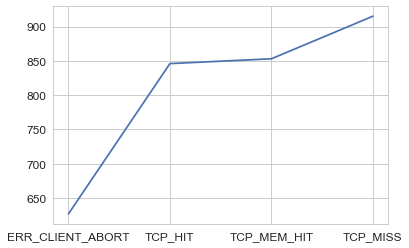

In [32]:
plt.plot(train[['CACHE_RESULT_CODE','TIME_TO_SERVER_MS']].groupby('CACHE_RESULT_CODE').agg({'TIME_TO_SERVER_MS':'median'}))

## Exploratory Data Analysis ##

### USER IP ###

In [34]:
len(train.USERS_IP.unique().tolist())

13

In [36]:
train[train.USERS_IP=='24.225.30.35'].CACHE_RESULT_CODE.value_counts()

TCP_MISS            1522
TCP_HIT               87
ERR_CLIENT_ABORT       1
Name: CACHE_RESULT_CODE, dtype: int64

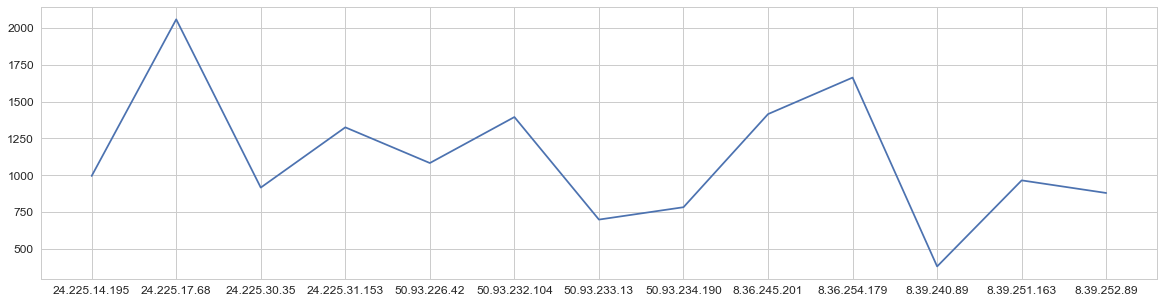

In [42]:
plt.figure(figsize=(20,5))
plt.plot(train[['USERS_IP','TIME_TO_SERVER_MS']].groupby('USERS_IP').agg({'TIME_TO_SERVER_MS':'mean'}))

### X_PLAY_BACK_SESSION_ID ###

In [43]:
len(train.X_PLAY_BACK_SESSION_ID.unique().tolist())

151

In [56]:
train.groupby('USERS_IP')['X_PLAY_BACK_SESSION_ID'].nunique()

USERS_IP
24.225.14.195     5
24.225.17.68      2
24.225.30.35      6
24.225.31.153    13
50.93.226.42      7
50.93.232.104     5
50.93.233.13     77
50.93.234.190     5
8.36.245.201      1
8.36.254.179      7
8.39.240.89       3
8.39.251.163      5
8.39.252.89      15
Name: X_PLAY_BACK_SESSION_ID, dtype: int64

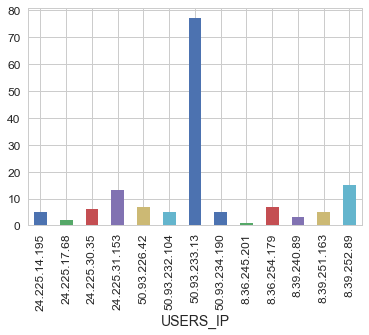

In [47]:
train.groupby('USERS_IP')['X_PLAY_BACK_SESSION_ID'].nunique().plot(kind='bar')

In [48]:
len(train.TimeStamp.unique().tolist())

24434

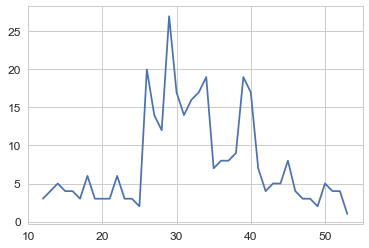

In [59]:
plt.plot(train.groupby('secondsWindow')['X_PLAY_BACK_SESSION_ID'].nunique())

### CHANNEL_ID ###

In [62]:
train.groupby(['CHANNEL_ID','X_PLAY_BACK_SESSION_ID'])['TIME_TO_SERVER_MS'].mean()

CHANNEL_ID  X_PLAY_BACK_SESSION_ID              
5004        06a2db0a-e1f7-49d0-b526-b9c915c979bf     592.0000000000
            1df72894-f1b9-4d0c-b61b-de1c8f4a5b9d    1006.7500000000
            8b59ddc3-d1ed-4256-b2c5-2b6b4b750963     574.0000000000
            9a74f34e-376f-46f8-86b6-49b367ccd018     112.8000000000
            a41ba536-3b38-4a1a-8a5a-4a6b5b7614cb      21.7500000000
            c5f952c6-5c52-4d9d-9f5c-b6bd3efca333     905.8971603991
            f08e91f8-65ac-498b-b01e-8a95992ba0b2    1415.0000000000
5087        00f10b8a-7286-4919-941e-984a2c3b488f      39.5000000000
            05081f60-6f3e-486a-bd82-ed5522678905    1101.4000000000
            08ca47d1-9ff8-4726-bcdf-8e5ee23e4a9f      26.6666666667
            0aab2c2f-0a97-4173-8fae-e4452af17ba9    1825.0000000000
            1a387958-4788-4030-a591-58155a7ca7f3      21.2500000000
            236378b6-69c9-415c-b7fb-e2b6aba4e23a    1381.5000000000
            27efc639-9ee6-4ca5-809e-2d84004a9ec1    1324.3333333333

### CACHE_RESULT_CODE ###

In [78]:
pd.crosstab(train.TimeStampInSec.dt.hour,train.CACHE_RESULT_CODE)

CACHE_RESULT_CODE,ERR_CLIENT_ABORT,TCP_HIT,TCP_MEM_HIT,TCP_MISS
TimeStampInSec,,,,
0,12,1275,141,1320
1,2,1419,157,1543
2,0,1131,310,1102
3,3,414,0,1580
4,1,354,0,728
5,0,420,0,621
6,0,176,0,585
7,0,0,0,311
12,0,0,0,39


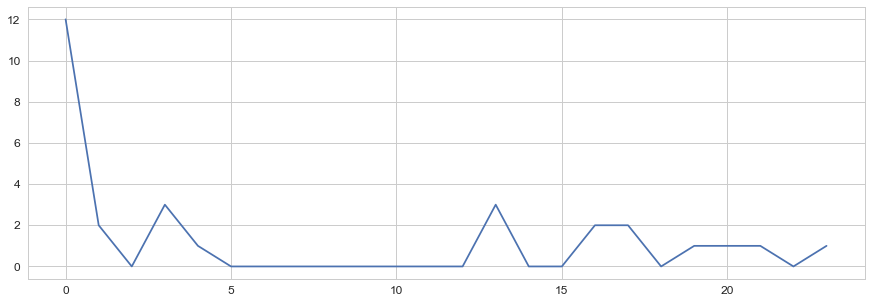

In [79]:
plt.figure(figsize=(15,5))
plt.plot(pd.crosstab(train.TimeStampInSec.dt.hour,train.CACHE_RESULT_CODE)['ERR_CLIENT_ABORT'])

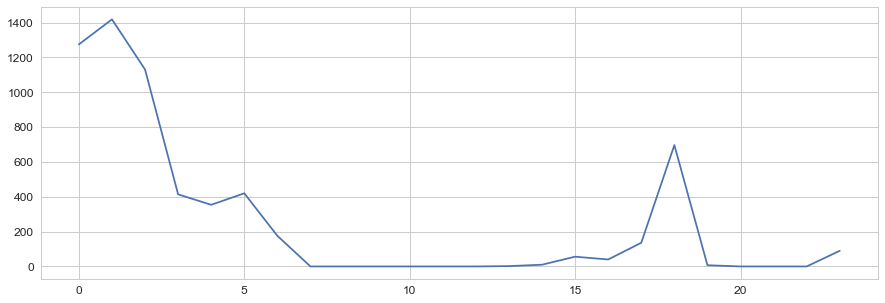

In [80]:
plt.figure(figsize=(15,5))
plt.plot(pd.crosstab(train.TimeStampInSec.dt.hour,train.CACHE_RESULT_CODE)['TCP_HIT'])

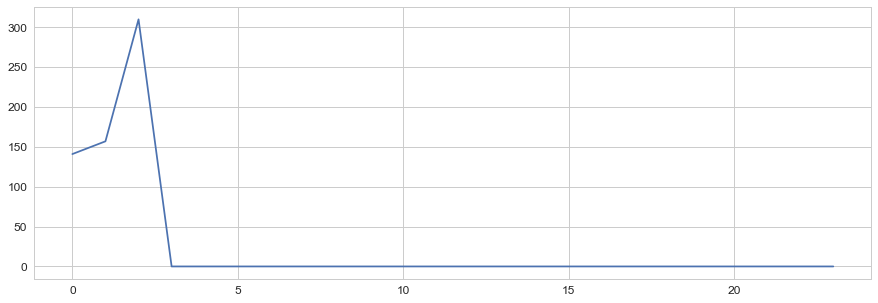

In [81]:
plt.figure(figsize=(15,5))
plt.plot(pd.crosstab(train.TimeStampInSec.dt.hour,train.CACHE_RESULT_CODE)['TCP_MEM_HIT'])

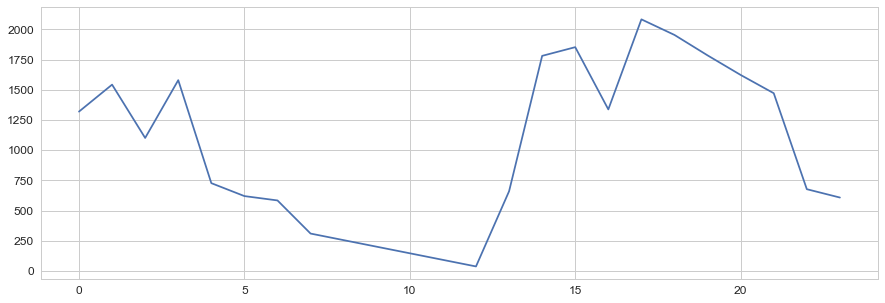

In [82]:
plt.figure(figsize=(15,5))
plt.plot(pd.crosstab(train.TimeStampInSec.dt.hour,train.CACHE_RESULT_CODE)['TCP_MISS'])

### Aggregate Analysis ###

In [83]:
train.groupby(['CHANNEL_ID','X_PLAY_BACK_SESSION_ID','USERS_IP'],as_index=False).agg({'TIME_TO_SERVER_MS':['max','min','mean','std','count','median',lambda x: max(x) - min(x)]}).round().reset_index()

index CHANNEL_ID                X_PLAY_BACK_SESSION_ID       USERS_IP  \
                                                                            
0       0       5004  06a2db0a-e1f7-49d0-b526-b9c915c979bf  24.225.31.153   
1       1       5004  1df72894-f1b9-4d0c-b61b-de1c8f4a5b9d   24.225.30.35   
2       2       5004  8b59ddc3-d1ed-4256-b2c5-2b6b4b750963    8.39.240.89   
3       3       5004  9a74f34e-376f-46f8-86b6-49b367ccd018    8.39.240.89   
4       4       5004  a41ba536-3b38-4a1a-8a5a-4a6b5b7614cb   24.225.30.35   
5       5       5004  c5f952c6-5c52-4d9d-9f5c-b6bd3efca333   24.225.30.35   
6       6       5004  f08e91f8-65ac-498b-b01e-8a95992ba0b2   8.36.245.201   
7       7       5087  00f10b8a-7286-4919-941e-984a2c3b488f   50.93.233.13   
8       8       5087  05081f60-6f3e-486a-bd82-ed5522678905   24.225.30.35   
9       9       5087  08ca47d1-9ff8-4726-bcdf-8e5ee23e4a9f   50.93.233.13   
10     10       5087  0aab2c2f-0a97-4173-8fae-e4452af17ba9  24.225.31.153   
11     11       5087  1a387958-4788-4030-a591-58155a7ca7f3   50.93.233.13   
12     12       5087  236378b6-69c9-415c-b7fb-e2b6aba4e23a  50.93.232.104   
13     13       5087  27efc639-9ee6-4ca5-809e-2d84004a9ec1   50.93.226.42   
14     14       5087  2a4c9b78-29c2-40f4-a9a3-8a1ce48c3941   50.93.233.13   
15     15       5087  2d21c8d8-6406-40db-8ba9-36bf0e6ca6e1   50.93.233.13   
16     16       5087  2d455129-b367-486e-9d6a-01287bbfaf6c   50.93.233.13   
17     17       5087  325bb547-584e-4136-be36-4a7c2263a877  50.93.234.190   
18     18       5087  36fa05c3-47a7-4e96-ab05-c4582964ceb5   50.93.233.13   
19     19       5087  3d72fd36-8c0a-4a67-9d75-cef2bc23b704   50.93.233.13   
20     20       5087  55311e7e-69a9-4b97-b700-099274f35bfe   50.93.233.13   
21     21       5087  6179daae-94cf-4c1e-b4a8-cdfc4e2676c5  24.225.31.153   
22     22       5087  6de8b7df-b74c-4904-86fc-67c9ce2fdd36  50.93.234.190   
23     23       5087  6f7eacd4-a81c-4a16-82f6-456a85f3070f   50.93.233.13   
24     24       5087  70856e86-39d8-4103-8e0a-b1e77011f2dd   50.93.233.13   
25     25       5087  8c0653c7-3f8d-46ae-a32d-1f89a9a0a723   50.93.233.13   
26     26       5087  91691bc1-0946-464e-8cb7-04c5ed91ed2c   50.93.233.13   
27     27       5087  92306904-0d2c-428c-8bad-4d4f3b40a25f   50.93.233.13   
28     28       5087  94eda3de-fd4c-4ee3-b602-5c455c886183  50.93.234.190   
29     29       5087  a8ead3e0-9d2d-4b64-94b4-c63648498dae   50.93.233.13   
30     30       5087  acf0e853-7cd0-4fc8-91ef-667831f40857   50.93.233.13   
31     31       5087  b69beb8c-301b-4f7e-857e-2f96ff23965c   50.93.233.13   
32     32       5087  c0b416c0-a25b-4361-a720-1274fa860ceb   50.93.233.13   
33     33       5087  d58523d0-612f-4411-aca2-65a45dcede0f   50.93.233.13   
34     34       5087  e6e6aa1c-08b5-4e19-898a-3ec135d5ee15  50.93.232.104   
35     35       5087  f0cecb40-d4cd-4929-a9ab-c9125cbaf79d  50.93.232.104   
36     36       5087  f1093247-c544-4c1a-a519-9b4d5b7e0781  50.93.234.190   
37     37       5087  f109dac9-523b-41a7-b6fd-2d7364c92ade   50.93.233.13   
38     38       5087  f15be355-1d4c-4d65-9c83-2d9cee410043   50.93.226.42   
39     39       5087  f1b6904b-3066-4a5c-bf4d-c73459d1325e  50.93.234.190   
40     40       5087  f32154f2-9998-4c14-b1ab-268000cf381f   50.93.226.42   
41     41       5087  fe3f3768-8375-42df-a3ae-e06ae12b0370   50.93.226.42   
42     42       5138  0e043366-7300-4285-a5bb-f89ec450c3a0    8.39.252.89   
43     43       5138  287ff94a-8eb5-4567-94e9-3b15d0a04e99  24.225.31.153   
44     44       5138  4ad6633f-1c99-4fbe-91f4-7e5328b2a64d    8.39.252.89   
45     45       5138  58000961-f0da-4d02-aa5c-6111ac6e226a    8.39.252.89   
46     46       5138  762a07dd-c1cf-4799-be31-16f8402e7136  24.225.31.153   
47     47       5138  a6b99aed-eaec-443f-81dc-2a7d3303fdb0    8.39.252.89   
48     48       5138  b04f1258-070c-4a03-8523-3d601c115bfc    8.39.252.89   
49     49       5138  d0f3b41d-4829-42b2-aa1b-7c764d2e6d90    8.39.252.89   


In [85]:
pd.crosstab(train.TimeStampInSec.dt.hour,train.CHANNEL_NAME)

CHANNEL_NAME,ABC KAKE,AMC East,ESPN,FS Midwest,Golf Channel,Paramount TV East,TNT East,YurVIEW COX 22
TimeStampInSec,,,,,,,,
0,413,1,27,1197,2,2,2,1104
1,609,0,21,1202,0,0,0,1289
2,167,0,7,778,0,0,0,1591
3,0,0,582,346,0,148,192,729
4,0,0,949,0,0,0,0,134
5,0,0,1041,0,0,0,0,0
6,0,0,761,0,0,0,0,0
7,0,0,311,0,0,0,0,0
12,0,11,28,0,0,0,0,0


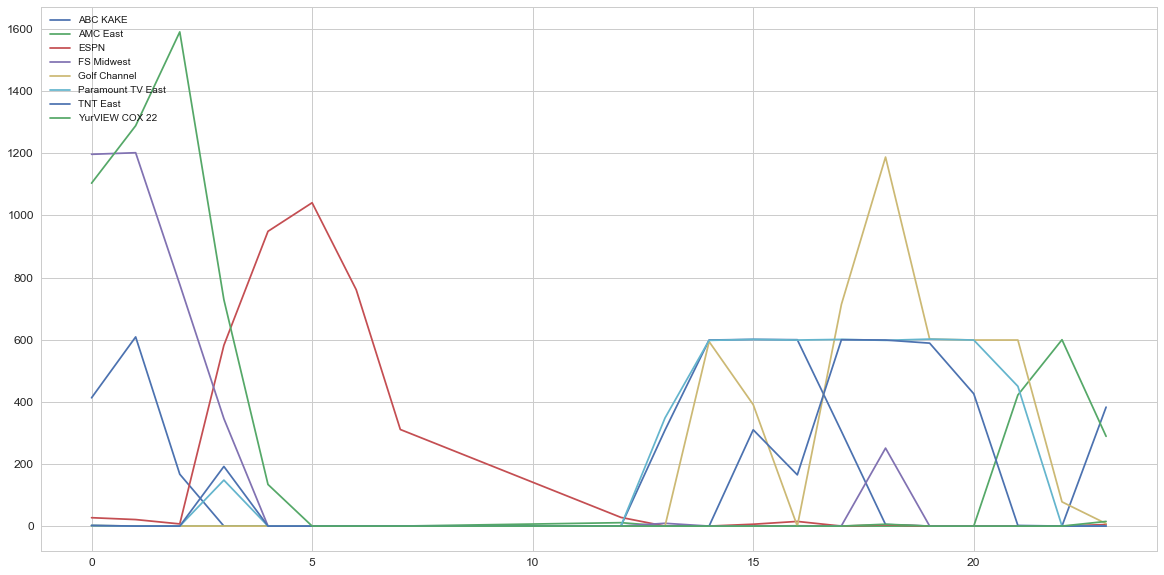

In [88]:
plt.figure(figsize=(20,10))

plt.plot(pd.crosstab(train.TimeStampInSec.dt.hour,train.CHANNEL_NAME)['ABC KAKE'])
plt.plot(pd.crosstab(train.TimeStampInSec.dt.hour,train.CHANNEL_NAME)['AMC East'])
plt.plot(pd.crosstab(train.TimeStampInSec.dt.hour,train.CHANNEL_NAME)['ESPN'])
plt.plot(pd.crosstab(train.TimeStampInSec.dt.hour,train.CHANNEL_NAME)['FS Midwest'])
plt.plot(pd.crosstab(train.TimeStampInSec.dt.hour,train.CHANNEL_NAME)['Golf Channel'])
plt.plot(pd.crosstab(train.TimeStampInSec.dt.hour,train.CHANNEL_NAME)['Paramount TV East'])
plt.plot(pd.crosstab(train.TimeStampInSec.dt.hour,train.CHANNEL_NAME)['TNT East'])
plt.plot(pd.crosstab(train.TimeStampInSec.dt.hour,train.CHANNEL_NAME)['YurVIEW COX 22'])
         
plt.legend(['ABC KAKE', 'AMC East', 'ESPN', 'FS Midwest','Golf Channel','Paramount TV East','TNT East','YurVIEW COX 22'], loc='upper left')

plt.show()


This above plot tries to show channel traffic at different hours of day

#### Time Spent per session ####

In [96]:
train['timeSpent'] = (train.TIME_TO_SERVER_MS+(train.UNIX_TIMESTAMP))-(train.SEGMENT_INDEX*6)

In [102]:
train['hourOfRequest'] = train.TimeStampInSec.dt.hour

In [97]:
train.head()

,USERS_IP,UNIX_TIMESTAMP,X_PLAY_BACK_SESSION_ID,CHANNEL_ID,CHANNEL_NAME,VARIANT,SEGMENT_INDEX,CACHE_RESULT_CODE,TIME_TO_SERVER_MS,secondsWindow,TimeStampInSec,timeSpent
5571,24.225.14.195,1535847877,a0e61e47-372a-4e02-8616-66b4daa40430,11010,YurVIEW COX 22,V864_W,255974638,TCP_MISS,25,27,2018-09-02 00:24:37,74
5572,24.225.14.195,1535847877,a0e61e47-372a-4e02-8616-66b4daa40430,11010,YurVIEW COX 22,V864_W,255974639,TCP_MISS,24,27,2018-09-02 00:24:37,67
5573,24.225.14.195,1535847878,a0e61e47-372a-4e02-8616-66b4daa40430,11010,YurVIEW COX 22,V864_W,255974641,TCP_MISS,29,27,2018-09-02 00:24:38,61
5574,24.225.14.195,1535847878,a0e61e47-372a-4e02-8616-66b4daa40430,11010,YurVIEW COX 22,V864_W,255974640,TCP_MISS,28,27,2018-09-02 00:24:38,66
5570,24.225.14.195,1535847879,a0e61e47-372a-4e02-8616-66b4daa40430,11010,YurVIEW COX 22,V864_W,255974642,TCP_MISS,25,27,2018-09-02 00:24:39,52


In [99]:
train.groupby(['CHANNEL_ID','X_PLAY_BACK_SESSION_ID','USERS_IP'],as_index=False).agg({'timeSpent':['sum']}).round().reset_index()

,index,CHANNEL_ID,X_PLAY_BACK_SESSION_ID,USERS_IP,timeSpent
,,,,,sum
0,0,5004,06a2db0a-e1f7-49d0-b526-b9c915c979bf,24.225.31.153,644
1,1,5004,1df72894-f1b9-4d0c-b61b-de1c8f4a5b9d,24.225.30.35,4189
2,2,5004,8b59ddc3-d1ed-4256-b2c5-2b6b4b750963,8.39.240.89,3675
3,3,5004,9a74f34e-376f-46f8-86b6-49b367ccd018,8.39.240.89,750
4,4,5004,a41ba536-3b38-4a1a-8a5a-4a6b5b7614cb,24.225.30.35,249
5,5,5004,c5f952c6-5c52-4d9d-9f5c-b6bd3efca333,24.225.30.35,1222175
6,6,5004,f08e91f8-65ac-498b-b01e-8a95992ba0b2,8.36.245.201,1466
7,7,5087,00f10b8a-7286-4919-941e-984a2c3b488f,50.93.233.13,460
8,8,5087,05081f60-6f3e-486a-bd82-ed5522678905,24.225.30.35,5707


Text(0,0.5,'Time Spent in Seconds')

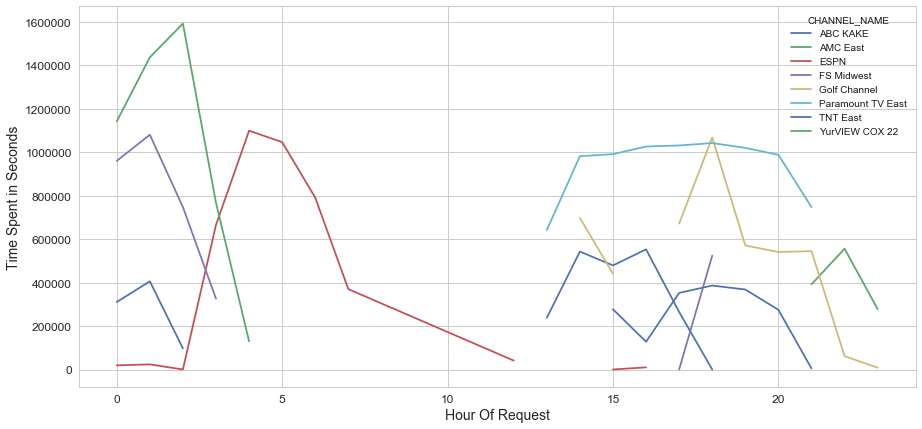

In [104]:
fig, ax = plt.subplots(figsize=(15,7))
train.groupby(['hourOfRequest','CHANNEL_NAME']).sum()['timeSpent'].unstack().plot(ax=ax)
ax.set_xlabel('Hour Of Request')
ax.set_ylabel('Time Spent in Seconds')

In [ ]:
train.groupby(['sessionID','USER_ID','CACHE_RESULT_CODE'],as_index=False).agg({'TIME_TO_SERVER_MS':['max','min','mean','std','count','median'],'RESPONSE_SIZE':['max','min','mean','std','count','median'],'sessionDiffInSec':['max','min','mean','std','count','median',lambda x: max(x) - min(x)]}).round().reset_index()#.to_csv("C:/Users/sutiwari/Downloads/Cybage/Aggregated_video_sessions.csv",index=False)